In [249]:
from bs4 import BeautifulSoup
import requests
import time
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


#### Helper Functions

In [81]:
def print_dict(temp):
    for key,value in temp.items():
        print(f"{key}: {value}")

In [ ]:
# Helper function to find links from a single episode
def find_links(soup):
    wiki_links = []
    for i in soup.find_all('a', href = True, title = True):
            href = i.attrs['href']
            if href.split("/")[1]=='wiki':
             wiki_links.append(href) 
    return np.unique(wiki_links)

In [ ]:
# Check if the company is public
def if_public(soup):
    type_comp = soup.find('td', class_='infobox-data category')
    if type_comp and 'Public' in type_comp.text:
        return True
    return False

### Getting the episodes from Wikipedia

In [82]:
url = 'https://en.wikipedia.org/wiki/List_of_South_Park_episodes'
page = requests.get(url)
soup = BeautifulSoup(page.content)
# print(soup)

### Extracting individual episodes

In [83]:
dict_sp = {}
i = 1
for table in soup.find_all('table', class_='wikitable plainrowheaders wikiepisodetable'):
    for tr in table.find_all('tr', class_ = 'vevent module-episode-list-row'):
        if 'id' in tr.find('th').attrs.keys():
            dict_sp[i] = {
                'date':tr.find('span',class_= 'bday dtstart published updated itvstart').contents[0], 
                'ep_id': tr.find('th').attrs['id'],
                'ep_wiki_link': tr.find('a', href=True, title=True).attrs['href'],
                'title': tr.find('a', href=True, title=True).attrs['title']}
            i = i + 1


# for key,value in dict_sp.items():
#     print(f"{key}: {value}")

### Identifying mentioned companies

In [85]:
# Appending the Wikipedia links from each episode to the dict
for key in dict_sp.keys():
    url = 'https://en.wikipedia.org/' + dict_sp[key]['ep_wiki_link']
    page_ep = requests.get(url)
    soup = BeautifulSoup(page_ep.content)
    dict_sp[key]['links_in_ep'] = find_links(soup)
    time.sleep(0.1)
    

print_dict(dict_sp)

1: {'date': '1997-08-13', 'ep_id': 'ep1', 'ep_wiki_link': '/wiki/Cartman_Gets_an_Anal_Probe', 'title': 'Cartman Gets an Anal Probe', 'links_in_ep': array(['/wiki/Alien_abduction', '/wiki/Alien_implants',
       '/wiki/An_Elephant_Makes_Love_to_a_Pig',
       '/wiki/Animation_director', '/wiki/Aspen,_Colorado',
       '/wiki/Associated_Press', '/wiki/Audio_commentary',
       '/wiki/Beavis_and_Butt-Head', '/wiki/Best_Buy',
       '/wiki/Big_Gay_Al%27s_Big_Gay_Boat_Ride', '/wiki/Bigfoot',
       '/wiki/Birmingham_Evening_Mail', '/wiki/Brian_Graden',
       '/wiki/Burbank,_California', '/wiki/Business_Wire',
       '/wiki/Cable_television_in_the_United_States',
       '/wiki/Cancelled_(South_Park)', '/wiki/Cannibal!_The_Musical',
       '/wiki/Carnivalesque', '/wiki/Cartman%27s_Mom_Is_a_Dirty_Slut',
       '/wiki/Cartman_Gets_an_Anal_Probe',
       '/wiki/Category:1990s_American_television_series_premieres',
       '/wiki/Category:1997_American_television_episodes',
       '/wiki/Category

### Finding publicly companies and matching w/ their ticker

In [93]:
all_unique_links = []    # all unique links that appear in the entirety of the show
companies = {}           # public companies mentioned

i = 1
count = 1


# Finding unique links to make matching easier
for key in dict_sp.keys():
    curr_links = dict_sp[key]['links_in_ep']
    all_unique_links.extend(curr_links)
    all_unique_links = list(np.unique(all_unique_links))

# Finding public companies and their ticker
for link in all_unique_links:
    url = 'https://en.wikipedia.org' + link
    page_ep = requests.get(url)
    soup = BeautifulSoup(page_ep.content, 'html.parser')
    
    if if_public(soup):
        name_tag = soup.find('caption', class_='infobox-title fn org')
        name = name_tag.contents[0] if name_tag else 'Unknown'
        
        ticker_tag = soup.find('a', href=True, class_='external text')
        ticker = ticker_tag.contents[0] if ticker_tag else 'No ticker'
        
        # Use a safer way to get the corresponding episode date
        date = [value['date'] for key, value in dict_sp.items() if link in value['links_in_ep']][0]
        
        companies[i] = {'name': name, 'date': date, 'ticker': ticker}
        i += 1
        print(f'FOUND {name} -----------------------------------------------')

    print(count)
    count += 1


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
FOUND Build-A-Bear Workshop, Inc. -----------------------------------------------
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
FOUND Campbell Soup Company -----------------------------------------------
1823
1824
1825
1826
FOUND 2737469 Canada Inc. -----------------------------------------------
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
FOUND Postmedia Network Canada Corp. ---------------------

3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460


4785
4786
4787
4788
4789
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800
4801
4802
4803
4804
4805
4806
4807
4808
4809
4810
4811
4812
4813
4814
4815
4816
4817
4818
4819
4820
4821
4822
4823
4824
4825
4826
4827
4828
4829
4830
4831
4832
4833
4834
4835
4836
4837
4838
4839
4840
4841
4842
4843
4844
4845
4846
4847
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868
4869
4870
4871
4872
4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984


6367
6368
6369
6370
6371
6372
6373
6374
6375
6376
6377
6378
6379
6380
6381
6382
6383
6384
6385
6386
6387
6388
6389
6390
6391
6392
6393
6394
6395
6396
6397
6398
6399
6400
6401
6402
6403
6404
6405
6406
6407
6408
6409
6410
6411
6412
6413
6414
6415
6416
6417
6418
6419
6420
6421
6422
6423
6424
6425
6426
6427
6428
6429
6430
6431
6432
6433
6434
6435
6436
6437
6438
6439
6440
6441
6442
6443
6444
6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6480
6481
6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6502
6503
6504
6505
6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566


7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076


9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565
9566
9567


10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
10951
10952
1095

12105
12106
12107
12108
12109
12110
12111
12112
12113
12114
12115
12116
12117
12118
12119
12120
12121
12122
12123
12124
12125
12126
12127
12128
12129
12130
12131
12132
12133
12134
12135
12136
12137
12138
12139
12140
12141
12142
12143
12144
12145
12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12158
12159
12160
12161
12162
12163
12164
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12217
12218
12219
12220
12221
12222
12223
12224
12225
12226
12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268
12269
12270
1227

13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
FOUND Yelp Inc. -----------------------------------------------
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504


In [294]:
# Manual tweeking of some companies
df = pd.DataFrame.from_dict(companies, orient='index')
df_uniq_comps = df.drop_duplicates(subset='ticker')


episode_to_date = {key: value['date'] for key, value in dict_sp.items()}

df_uniq_comps.loc[:, 'date'] = df_uniq_comps['date'].map(episode_to_date)

#Replacing Austar
df_uniq_comps.at[6, 'name'] = 'Liberty Global Ltd.'
df_uniq_comps.at[6, 'ticker'] = 'LBTYA'

#Chipotle
df_uniq_comps.at[16, 'ticker'] = 'CMG'

#Canwest -> Postmedia
df_uniq_comps.at[13, 'name'] = 'Postmedia Network Canada Corp.'
df_uniq_comps.at[13, 'ticker'] = 'PNC-A.TO'
df_uniq_comps.at[13, 'date'] = '2012-03-01'


# df_uniq_comps.drop([14])
df_uniq_comps = df_uniq_comps.drop(14, axis=0)

#Capcom
df_uniq_comps.at[15, 'ticker'] = '9697.T'

#Denny's
df_uniq_comps.at[17, 'ticker'] = 'DENN'

# Unknown
df_uniq_comps = df_uniq_comps.drop(18, axis=0)

#Discovery Zone
df_uniq_comps = df_uniq_comps.drop(19, axis=0)

#eBay
df_uniq_comps.at[22, 'ticker'] = 'EBAY'

#fedEx
df_uniq_comps.at[24, 'ticker'] = 'FDX'

#Harley Davidson
df_uniq_comps.at[26, 'ticker'] = 'HOG'

#Home Depot
df_uniq_comps.at[27, 'ticker'] = 'HD'

#KUER-FM
df_uniq_comps = df_uniq_comps.drop(28, axis=0)

#MSFT
df_uniq_comps.at[33, 'ticker'] = 'MSFT'

#NPR
df_uniq_comps = df_uniq_comps.drop(34, axis=0)

#News corp.
df_uniq_comps = df_uniq_comps.drop(36, axis=0)
df_uniq_comps.at[20, 'date'] = '2001-07-11'

#Nike
df_uniq_comps.at[37, 'ticker'] = 'NKE'

#Reddit
df_uniq_comps.at[44, 'ticker'] = 'RDDT'
df_uniq_comps.at[44, 'date'] = '2024-04-01'


#Sanrio
df_uniq_comps.at[47, 'ticker'] = '8136.T'

#SolarCity
df_uniq_comps = df_uniq_comps.drop(48, axis=0)

#Sony
df_uniq_comps.at[49, 'ticker'] = 'SONY'

#Special Broadcasting Service
df_uniq_comps = df_uniq_comps.drop(50, axis=0)

#TESLA
df_uniq_comps.at[52, 'ticker'] = 'TSLA'

#Time Warner Cable Inc.
df_uniq_comps.at[57, 'ticker'] = 'CHTR'

#UPS
df_uniq_comps.at[61, 'ticker'] = 'UPS'

#Viacom
df_uniq_comps.at[39, 'date'] = '2006-04-12'
df_uniq_comps = df_uniq_comps.drop(63, axis=0)

#Walmart
df_uniq_comps.at[65, 'ticker'] = 'WMT'

#Dropping Acclaim & Borders
df_uniq_comps = df_uniq_comps.drop(1, axis=0)
df_uniq_comps = df_uniq_comps.drop(10, axis=0)

#BP
df_uniq_comps.at[7, 'ticker'] = 'BP'

#Adding New York Times Company
df_uniq_comps.at[68, 'name'] = 'New York Times Company'
df_uniq_comps.at[68, 'ticker'] = 'NYT'
df_uniq_comps.at[68, 'date'] = '2009-04-08'

#Adding Choice Hotel International
df_uniq_comps.at[68, 'name'] = 'Choice Hotel International, Inc.'
df_uniq_comps.at[68, 'ticker'] = 'CHH'
df_uniq_comps.at[68, 'date'] = '2008-03-19'

#Adding Red Robin Gourmet Burgers
df_uniq_comps.at[69, 'name'] = 'Red Robin Gourmet Burgers, Inc.'
df_uniq_comps.at[69, 'ticker'] = 'RRGB'
df_uniq_comps.at[69, 'date'] = '2011-11-02'

#Adding Netlfix
df_uniq_comps.at[70, 'name'] = 'Netflix, Inc.'
df_uniq_comps.at[70, 'ticker'] = 'NFLX'
df_uniq_comps.at[70, 'date'] = '2017-10-11'

#Playboy IPO
df_uniq_comps.at[41, 'date'] = '2021-06-01'

#Yelp IPO
df_uniq_comps.at[66, 'date'] = '2012-11-01'

#Paramount IPO
df_uniq_comps.at[39, 'date'] = '2022-04-01'

#Lyft IPO
df_uniq_comps.at[29, 'date'] = '2019-05-01'

#Beyond Meat IPO
df_uniq_comps.at[9, 'date'] = '2019-07-01'

#Uber IPO
df_uniq_comps.at[71, 'name'] = 'Uber, Inc.'
df_uniq_comps.at[71, 'ticker'] = 'UBER'
df_uniq_comps.at[71, 'date'] = '2019-10-01'



df_uniq_comps = df_uniq_comps.sort_values('date')
df_uniq_comps.reset_index(drop=True, inplace=True)
display(df_uniq_comps)

,name,date,ticker
0,"Best Buy Co., Inc.",1997-08-13,BBY
1,McDonald's Corporation,1997-12-17,MCD
2,"Amazon.com, Inc.",1998-10-28,AMZN
3,Starbucks Corporation,1998-12-16,SBUX
4,Denny's Corporation,2000-12-13,DENN
5,The Walt Disney Company,2001-07-11,DIS
6,Campbell Soup Company,2003-04-30,CPB
7,"Capcom Co., Ltd.",2004-03-17,9697.T
8,Walmart Inc.,2004-11-03,WMT
9,"Sanrio Company, Ltd.",2006-10-04,8136.T


#### Getting stock market data from Yahoo Finance API

In [295]:
#download relevant data for all comp
comp_str = " ".join(df_uniq_comps['ticker'])
start_date = df_uniq_comps['date'].iloc[0]
data = yf.download(comp_str, start = start_date, end = '2024-10-01')

columns_to_select = [(metric, ticker) for metric, ticker in data.columns if metric in ['Open', 'Close']]
comp_hist_prices = data.loc[:, columns_to_select]

spy_data = yf.download("SPY", start = start_date, end = '2024-10-01')
spy_hist_prices = spy_data[['Open', 'Close']]


[*********************100%***********************]  45 of 45 completed
[*********************100%***********************]  1 of 1 completed


In [381]:
# comp_of_interest = comp_hist_prices.loc[:,('Open', 'PNC-A.TO')].dropna()
# display(comp_of_interest)

display(comp_hist_prices)
# date_of_interest = '2012-11-1'
# spx_prices_on_date = spx_hist_prices.loc[date_of_interest]

# print(spx_prices_on_date)


Price                       Close                                              \
Ticker                     8136.T  9697.T        AAPL        AMZN         AXP   
Date                                                                            
1997-08-13 00:00:00+00:00     NaN     NaN    0.210938    0.109896   23.997808   
1997-08-14 00:00:00+00:00     NaN     NaN    0.205357    0.107813   24.125456   
1997-08-15 00:00:00+00:00     NaN     NaN    0.207589    0.105729   23.523687   
1997-08-18 00:00:00+00:00     NaN     NaN    0.210938    0.102083   23.487217   
1997-08-19 00:00:00+00:00     NaN     NaN    0.218192    0.108333   24.161926   
...                           ...     ...         ...         ...         ...   
2024-09-24 00:00:00+00:00  4112.0  3351.0  227.369995  193.960007  266.209991   
2024-09-25 00:00:00+00:00  3977.0  3302.0  226.369995  192.529999  266.170013   
2024-09-26 00:00:00+00:00  4122.0  3421.0  227.520004  191.160004  268.149994   
2024-09-27 00:00:00+00:00  4155.0  3455.0  227.789993  187.970001  271.059998   
2024-09-30 00:00:00+00:00  4130.0  3328.0  233.000000  186.330002  271.200012   

Price                                                                         \
Ticker                           BBW         BBY         BP  BYND       CAKE   
Date                                                                           
1997-08-13 00:00:00+00:00        NaN    1.680556  42.875000   NaN   4.759259   
1997-08-14 00:00:00+00:00        NaN    1.750000  42.156250   NaN   4.765432   
1997-08-15 00:00:00+00:00        NaN    1.791667  40.000000   NaN   4.938272   
1997-08-18 00:00:00+00:00        NaN    1.680556  40.562500   NaN   5.160494   
1997-08-19 00:00:00+00:00        NaN    1.826389  42.031250   NaN   5.271605   
...                              ...         ...        ...   ...        ...   
2024-09-24 00:00:00+00:00  32.299999   98.980003  32.830002  6.79  39.919998   
2024-09-25 00:00:00+00:00  31.049999   97.839996  31.680000  6.75  40.139999   
2024-09-26 00:00:00+00:00  31.120001  100.000000  30.790001  7.40  41.130001   
2024-09-27 00:00:00+00:00  32.750000  102.260002  31.420000  7.16  39.799999   
2024-09-30 00:00:00+00:00  34.369999  103.300003  31.389999  6.78  40.549999   

Price                      ...       Open                                   \
Ticker                     ...       SATS       SBUX       SONY        SSP   
Date                       ...                                               
1997-08-13 00:00:00+00:00  ...        NaN   2.406250   9.750000  52.074093   
1997-08-14 00:00:00+00:00  ...        NaN   2.500000   9.818750  51.574978   
1997-08-15 00:00:00+00:00  ...        NaN   2.562500  10.018750  51.325420   
1997-08-18 00:00:00+00:00  ...        NaN   2.535156   9.787500  49.245785   
1997-08-19 00:00:00+00:00  ...        NaN   2.554688   9.400000  48.913044   
...                        ...        ...        ...        ...        ...   
2024-09-24 00:00:00+00:00  ...  26.209999  95.470001  19.242001   1.730000   
2024-09-25 00:00:00+00:00  ...  25.250000  94.260002  19.160000   1.750000   
2024-09-26 00:00:00+00:00  ...  25.950001  98.500000  19.525999   1.780000   
2024-09-27 00:00:00+00:00  ...  27.000000  97.650002  19.525999   1.960000   
2024-09-30 00:00:00+00:00  ...  27.870001  97.389999  19.379999   2.310000   

Price                                                                    \
Ticker                           TSLA       UBER       UHAL         UPS   
Date                                                                      
1997-08-13 00:00:00+00:00         NaN        NaN   3.087500         NaN   
1997-08-14 00:00:00+00:00         NaN        NaN   2.900000         NaN   
1997-08-15 00:00:00+00:00         NaN        NaN   2.675000         NaN   
1997-08-18 00:00:00+00:00         NaN        NaN   2.687500         NaN   
1997-08-19 00:00:00+00:00         NaN        NaN   2.737500         NaN   
...                               ...        ...   

# Strategies

### Long only
* We will buy $\$ 100$ of both the stock and the S&P 500 at the mention of a publicly traded company

In [344]:
investment_dates = df_uniq_comps['date']
company_list = df_uniq_comps['ticker'].tolist()


comp_running_total = 0
comp_invest = {}          #ticker, date, inv_100, curr_val
spy_invest = {}
spy_amzn_invest = {}
spy_cmg_invest = {}
spy_bby_invest = {}

portfolio_df = pd.DataFrame(index=company_list, columns=investment_dates)



# helper to update running total of both comp_invest and spy
def update_portfolio(_curr_date):
    #update company portfolio
    for ticker_, investment_ in comp_invest.items():
        shares_ = investment_['shares']
        curr_val = comp_hist_prices.loc[(_curr_date),('Close', ticker_)] * shares_
        portfolio_df.loc[ticker_, _curr_date] = curr_val
        
    #update S&P 500 portfolio
    spy_total = 0
    for date, shares in spy_invest.items():
        curr_val = spy_hist_prices.loc[_curr_date, 'Close'] * shares
        spy_total += curr_val
    
    portfolio_df.loc['SPY', _curr_date] = spy_total
    
    spy_amzn_total = 0
    for date, shares in spy_amzn_invest.items():
        curr_val = spy_hist_prices.loc[_curr_date, 'Close'] * shares
        spy_amzn_total += curr_val
    
    portfolio_df.loc['SPY_AMZN', _curr_date] = spy_amzn_total
    
    spy_bby_total = 0
    for date, shares in spy_bby_invest.items():
        curr_val = spy_hist_prices.loc[_curr_date, 'Close'] * shares
        spy_bby_total += curr_val
    
    portfolio_df.loc['SPY_BBY', _curr_date] = spy_amzn_total
    
    spy_cmg_total = 0
    for date, shares in spy_cmg_invest.items():
        curr_val = spy_hist_prices.loc[_curr_date, 'Close'] * shares
        spy_cmg_total += curr_val
    
    portfolio_df.loc['SPY_CMG', _curr_date] = spy_cmg_total
    
    
    
for index, row in df_uniq_comps.iterrows():
    _date = str(row['date'])
#     print(_date)
    _ticker = row['ticker']
    _shares = 100 / comp_hist_prices.loc[_date,('Open', _ticker)] 
    comp_invest[_ticker] = {
        'date': _date,
        'shares': _shares,
    }
    

        
    _spy_shares = 100 / spy_hist_prices.loc[_date, 'Open']

    spy_invest[_date] = _spy_shares
    
    if _ticker == 'AMZN':
            spy_amzn_shares = 100 / spy_hist_prices.loc[_date, 'Open']
            spy_amzn_invest[_date] = spy_amzn_shares
    
    if _ticker == 'BBY':
            spy_bby_shares = 100 / spy_hist_prices.loc[_date, 'Open']
            spy_bby_invest[_date] = spy_bby_shares
    
    if _ticker == 'CMG':
            spy_cmg_shares = 100 / spy_hist_prices.loc[_date, 'Open']
            spy_cmg_invest[_date] = spy_cmg_shares
    
    
    update_portfolio(_date)


update_portfolio('2024-09-30')
portfolio_df.fillna(0, inplace=True)
portfolio_df = portfolio_df.T.drop_duplicates().T
display(portfolio_df)

date,1997-08-13,1997-12-17,1998-10-28,1998-12-16,2000-12-13,2001-07-11,2003-04-30,2004-03-17,2004-11-03,2006-10-04,...,2017-10-25,2019-05-01,2019-07-01,2019-10-01,2020-09-30,2021-06-01,2022-04-01,2023-03-01,2024-04-01,2024-09-30
BBY,102.109755,232.067525,615.189992,725.738492,700.422070,1742.582634,1400.709128,1953.620535,2424.304358,3438.987913,...,3352.101802,4485.874395,4400.810995,4132.254092,6761.925412,6981.267264,5491.443932,5015.089632,4960.405984,6276.457094
MCD,0.000000,99.045020,146.793997,153.069577,135.879945,116.300134,74.652116,125.293318,127.956341,174.624829,...,714.128248,847.672570,900.627571,912.502065,958.210119,1018.237405,1088.130969,1146.935885,1223.334248,1329.375213
AMZN,0.000000,0.000000,100.106930,247.140576,121.859986,78.708726,147.206861,219.604533,184.303609,168.089818,...,4991.949462,9807.907043,9862.654314,8905.527925,16155.965367,16514.721392,16784.352896,9458.387129,18570.948945,19120.986504
SBUX,0.000000,0.000000,0.000000,96.969704,170.909118,160.504258,182.380621,289.823056,414.875179,557.924876,...,1680.601332,2405.469165,2623.612410,2684.431780,2666.123777,3516.974692,2838.962568,3147.403879,2840.203809,3025.144400
DENN,0.000000,0.000000,0.000000,0.000000,114.285714,243.809527,182.857150,664.380973,1033.142889,1078.857131,...,3928.381057,5824.000186,6247.619048,6887.619164,3047.619048,5257.142857,4242.285738,3593.142846,2718.476214,1965.714228
DIS,0.000000,0.000000,0.000000,0.000000,0.000000,103.321032,68.856091,95.202953,94.612544,115.092248,...,365.824248,510.134062,529.846635,484.586207,464.125480,668.957108,512.453174,368.592236,454.587107,359.801986
CPB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.100320,122.807017,121.277551,163.517765,...,207.872245,172.379669,180.476832,210.616287,217.588844,219.838056,202.654072,233.513274,200.899689,220.062974
9697.T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.937658,77.000842,146.166807,...,236.983993,0.000000,376.579612,479.359730,987.363100,1184.498736,1036.225779,1454.085931,1887.110362,2242.965459
WMT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.452353,90.452717,...,161.518803,185.031032,201.935008,215.133255,255.403421,258.598032,275.666295,255.841548,328.587071,442.223434
8136.T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.373740,...,94.393939,0.000000,122.424242,105.858589,95.656563,91.818182,125.858589,206.565663,462.121212,625.757576


### Calculating returns

In [301]:
no_of_inv = len(investment_dates) - 1

invested = no_of_inv * 100
ret_sp = portfolio_df['2024-09-30'].drop(['SPY']).sum()
roi_comp = (ret_sp / invested) * 100

ret_spy = portfolio_df['2024-09-30']['SPY']
roi_spy = (ret_spy / invested) * 100



print("Invested amount: ",invested)
print("Total Return(South Park): ", ret_sp)
print("ROI(South Park): ", roi_comp)
print("\n")
print("Total Return(S&P 500): ", ret_spy)
print("ROI(S&P 500): ", roi_spy)

Invested amount:  4400
Total Return(South Park):  55483.419804310935
ROI(South Park):  1260.9868137343394


Total Return(S&P 500):  17558.463920505346
ROI(S&P 500):  399.0559981933033


### Plotting returns

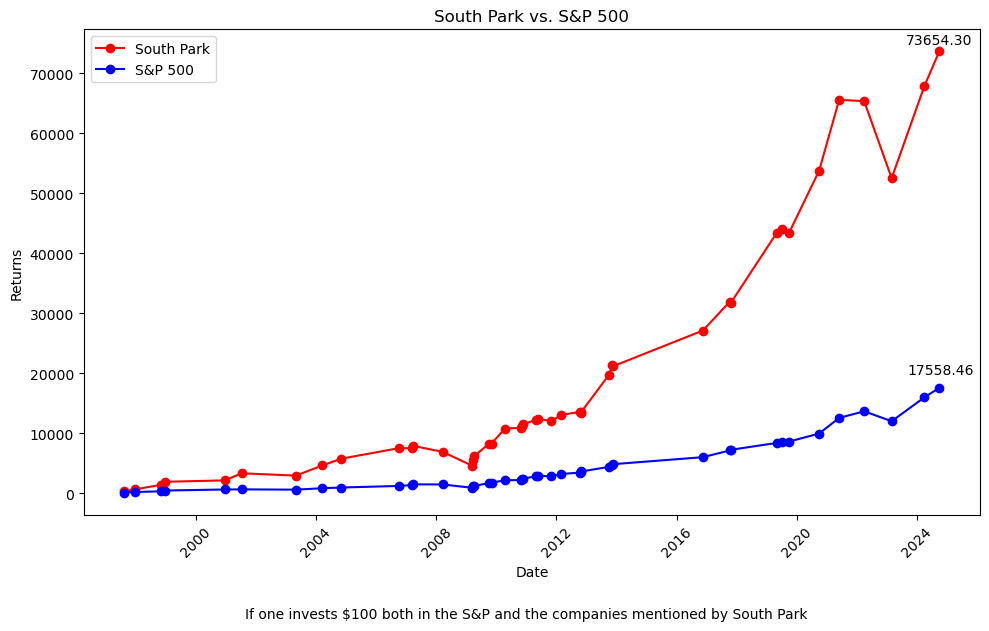

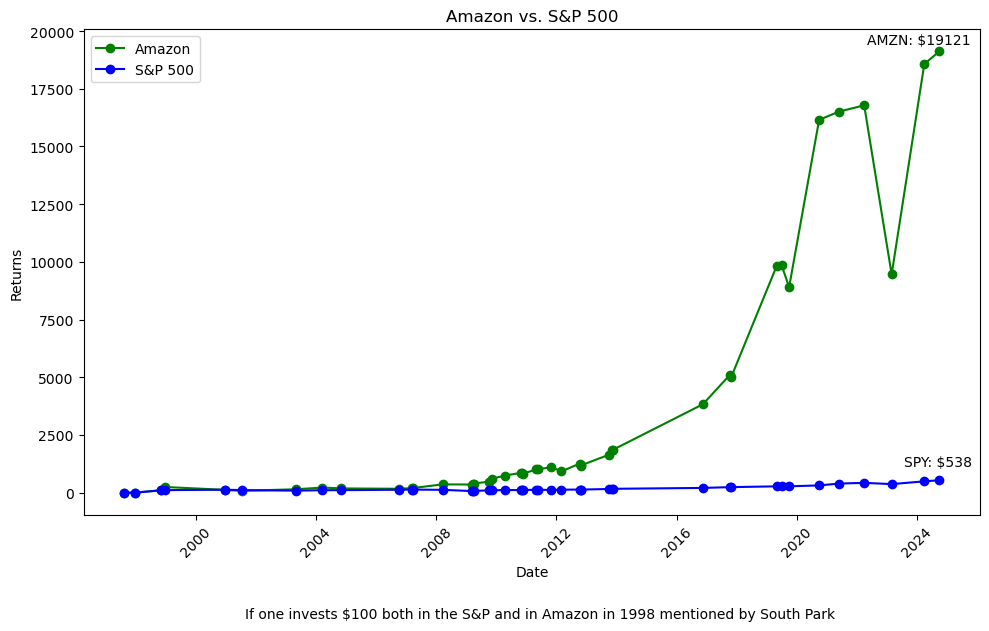

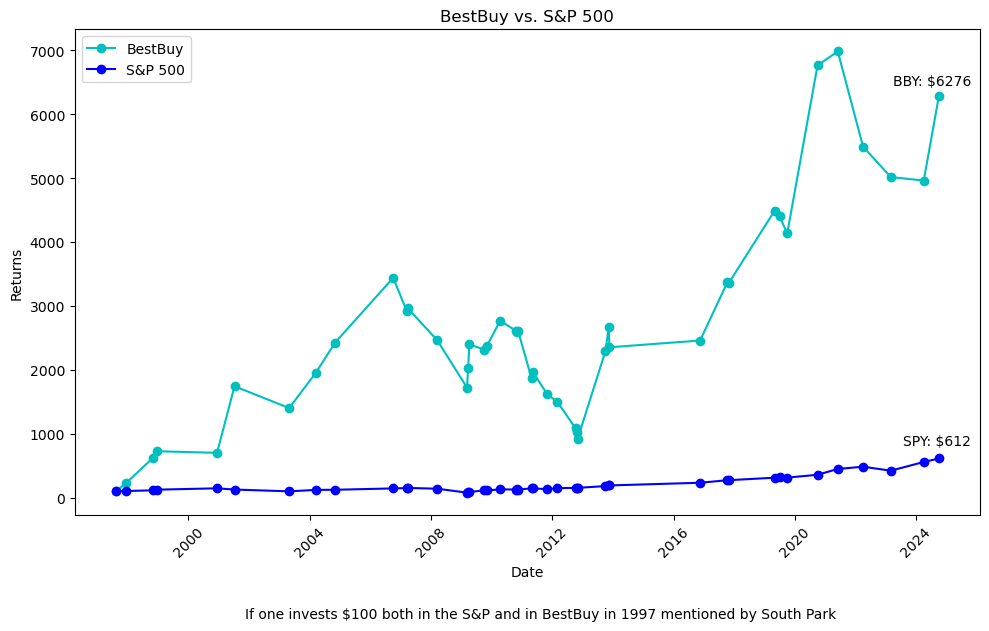

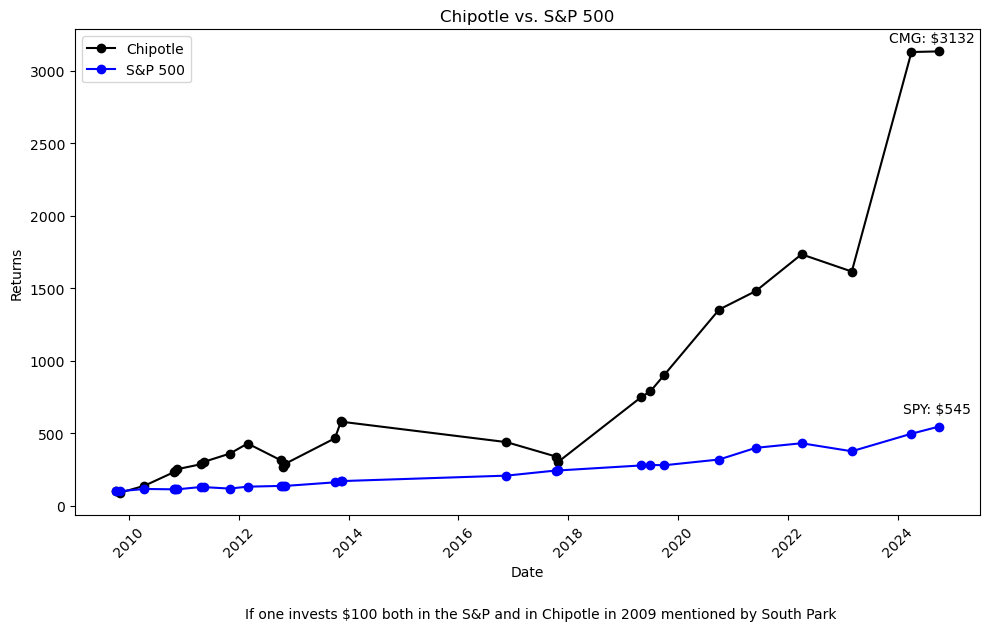

In [413]:
df_excluded_last = portfolio_df.iloc[:-1]

df_excluded_last.columns = pd.to_datetime(df_excluded_last.columns, errors='coerce')
df = df_excluded_last.dropna(axis=1, how='all')  # Drop columns with NaT

df_numeric = df.select_dtypes(include=['float64', 'int64'])

column_sums = df_numeric.sum()

# Plot total returns over time
plt.figure(figsize=(10,6))
plt.plot(column_sums.index, column_sums.values, marker='o', linestyle='-', color='r', label= 'South Park')
plt.plot(column_sums.index, portfolio_df.loc['SPY'], marker='o', linestyle='-', color= 'b', label= 'S&P 500')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('South Park vs. S&P 500')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.figtext(0.25, -0.04, 'If one invests $100 both in the S&P and the companies mentioned by South Park')

#last value for SPY
last_x_value_spy_1 = column_sums.index[-1]  # The x value (date) of the last point
last_y_value_spy_1 = portfolio_df.loc['SPY'].iloc[-1]  # The y value (returns) of the last SPY point
plt.annotate(f'{last_y_value_spy_1:.2f}', (last_x_value_spy_1, last_y_value_spy_1), 
             textcoords="offset points", xytext=(1,10), ha='center')

#last value for South Park
last_x_value_sp = column_sums.index[-1]  # The x value (date) of the last point
last_y_value_sp = column_sums.values[-1]    # The y value (returns) of the last SPY point
plt.annotate(f'{last_y_value_sp:.2f}', (last_x_value_sp, last_y_value_sp), 
             textcoords="offset points", xytext=(0,5), ha='center')
plt.savefig('SP_SPY.png')
plt.show()




# Plot AMZN vs. SPY returns over time
plt.figure(figsize=(10,6))
plt.plot(column_sums.index, portfolio_df.loc['AMZN'], marker='o', linestyle='-', color='g', label= 'Amazon')
plt.plot(column_sums.index, portfolio_df.loc['SPY_AMZN'], marker='o', linestyle='-', color= 'b', label= 'S&P 500')


plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Amazon vs. S&P 500')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.figtext(0.25, -0.04, 'If one invests $100 both in the S&P and in Amazon in 1998 mentioned by South Park')

#last value for SPY_AMZN
last_x_value_spy = column_sums.index[-1]  # The x value (date) of the last point
last_y_value_spy = portfolio_df.loc['SPY_AMZN'].iloc[-1]  # The y value (returns) of the last SPY point
plt.annotate(f'SPY: ${last_y_value_spy:.0f}', (last_x_value_spy, last_y_value_spy), 
             textcoords="offset points", xytext=(-1,10), ha='center')

#last value for AMZN
last_x_value_amzn = column_sums.index[-1]  # The x value (date) of the last point
last_y_value_amzn = portfolio_df.loc['AMZN'].iloc[-1]  # The y value (returns) of the last SPY point
plt.annotate(f'AMZN: ${last_y_value_amzn:.0f}', (last_x_value_amzn, last_y_value_amzn), 
             textcoords="offset points", xytext=(-15,5), ha='center')
plt.savefig('AMZN_SPY.png')
plt.show()




# Plot BBY vs. SPY returns over time
plt.figure(figsize=(10,6))
plt.plot(column_sums.index, portfolio_df.loc['BBY'], marker='o', linestyle='-', color='c', label= 'BestBuy')
plt.plot(column_sums.index, portfolio_df.loc['SPY_BBY'], marker='o', linestyle='-', color= 'b', label= 'S&P 500')

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('BestBuy vs. S&P 500')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc= 'upper left')
plt.figtext(0.25, -0.04, 'If one invests $100 both in the S&P and in BestBuy in 1997 mentioned by South Park')

#last value for SPY_BBY
last_x_value_spy_2 = column_sums.index[-1]  # The x value (date) of the last point
last_y_value_spy_2 = portfolio_df.loc['SPY_BBY'].iloc[-1]  # The y value (returns) of the last SPY point
plt.annotate(f'SPY: ${last_y_value_spy_2:.0f}', (last_x_value_spy_2, last_y_value_spy_2), 
             textcoords="offset points", xytext=(-1,10), ha='center')

#last value for BBY
last_x_value_bby = column_sums.index[-1]  # The x value (date) of the last point
last_y_value_bby = portfolio_df.loc['BBY'].iloc[-1]  # The y value (returns) of the last SPY point
plt.annotate(f'BBY: ${last_y_value_bby:.0f}', (last_x_value_bby, last_y_value_bby), 
             textcoords="offset points", xytext=(-5,8.5), ha='center')
plt.savefig('BBY_SPY.png')
plt.show()


# Plot CMG vs. SPY returns over time
non_zero_mask = (portfolio_df.loc['CMG'] != 0) & (portfolio_df.loc['SPY_CMG'] != 0)

filtered_df = portfolio_df.loc[:, non_zero_mask]
filtered_df.columns = pd.to_datetime(filtered_df.columns)


plt.figure(figsize=(10,6))
plt.plot(filtered_df.columns, filtered_df.loc['CMG'], marker='o', linestyle='-', color='k', label='Chipotle')
plt.plot(filtered_df.columns, filtered_df.loc['SPY_CMG'], marker='o', linestyle='-', color='b', label='S&P 500')


plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Chipotle vs. S&P 500')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left')
plt.figtext(0.25, -0.04, 'If one invests $100 both in the S&P and in Chipotle in 2009 mentioned by South Park')

last_x_value_spy_3 = filtered_df.columns[-1]  # The x value (date) of the last point in filtered data
last_y_value_spy_3 = filtered_df.loc['SPY_CMG'].iloc[-1]  # The y value (returns) of the last SPY point
plt.annotate(f'SPY: ${last_y_value_spy_3:.0f}', (last_x_value_spy_3, last_y_value_spy_3), 
             textcoords="offset points", xytext=(-1,10), ha='center')

last_x_value_cmg = filtered_df.columns[-1]  # The x value (date) of the last point in filtered data
last_y_value_cmg = filtered_df.loc['CMG'].iloc[-1]  # The y value (returns) of the last CMG point
plt.annotate(f'CMG: ${last_y_value_cmg:.0f}', (last_x_value_cmg, last_y_value_cmg), 
             textcoords="offset points", xytext=(-5,6.5), ha='center')
plt.savefig('CMG_SPY.png')
plt.show()



## Long / Short

In [424]:
investment_dates = df_uniq_comps['date']
company_list = df_uniq_comps['ticker'].tolist()
investment_dates = df_uniq_comps['date']
company_list = df_uniq_comps['ticker'].tolist()

comp_hist_prices.index = comp_hist_prices.index.tz_localize(None)
spy_hist_prices.index = spy_hist_prices.index.tz_localize(None)

# Global variables
comp_investments_ls = {}
portfolio_value = 100
profits = 0
rebalance_log = []
investment_dates = {}

# Helper function to rebalance the portfolio
def rebalance_portfolio(current_date, new_ticker=None):
    global profits, comp_investments_ls, portfolio_value

    # Ensure current_date is tz-naive to match the data
    current_date = pd.to_datetime(current_date).tz_localize(None)
    
    # Handle special case for first company investment
    if len(comp_investments_ls) == 0 and new_ticker:
        # Invest the full $100 into the first company
        try:
            initial_price = comp_hist_prices.loc[current_date, ('Close', new_ticker)]
        except KeyError:
            print(f"Price data for {new_ticker} is missing on {current_date}. Skipping investment.")
            return
        
        comp_investments_ls[new_ticker] = 100 / initial_price
        investment_dates[new_ticker] = current_date  # Track the investment date
        print(f"Invested $100 into {new_ticker} on {current_date}")
        rebalance_log.append((current_date, portfolio_value, profits))
        return

    # Fetch current prices for the companies in the portfolio
    current_prices = {}
    for ticker in comp_investments_ls.keys():
        try:
            # Ensure that we're using tz-naive indexing for current_date
            current_prices[ticker] = comp_hist_prices.loc[current_date, ('Close', ticker)]
        except KeyError:
            print(f"Price data missing for {ticker} on {current_date}. Skipping.")
            continue

    # Check for companies held for more than 12 months and sell them
    tickers_to_sell = []
    for ticker, invest_date in investment_dates.items():
        if (current_date - invest_date) >= pd.Timedelta(days=30):
            tickers_to_sell.append(ticker)

    # Sell the companies held for more than 12 months
    for ticker in tickers_to_sell:
        sell_price = current_prices.get(ticker, None)
        if sell_price is not None:
            shares = comp_investments_ls[ticker]
            profits += sell_price * shares
            del comp_investments_ls[ticker]  # Remove from active investments
            del investment_dates[ticker]  # Remove from investment dates

    # Calculate the current portfolio value
    total_value = sum(comp_investments_ls.get(ticker, 0) * current_prices.get(ticker, 0) for ticker in comp_investments_ls)

    # Capture profit: If the portfolio has grown beyond $100, take the excess out as profit
    if total_value > portfolio_value:
        profits += total_value - portfolio_value
        total_value = portfolio_value  # Reset the portfolio value to $100

    # Rebalance the portfolio to include a new company, if added
    if new_ticker:
        # Add new company to the portfolio
        try:
            current_prices[new_ticker] = comp_hist_prices.loc[current_date, ('Close', new_ticker)]
        except KeyError:
            print(f"Price data for {new_ticker} is missing on {current_date}. Skipping addition.")
            return
        comp_investments_ls[new_ticker] = 0  # Add new ticker with 0 shares temporarily
        investment_dates[new_ticker] = current_date  # Track the new investment date

    # Calculate the number of companies to rebalance
    num_companies = len(comp_investments_ls)
    equal_investment_per_company = portfolio_value / num_companies

    for ticker in comp_investments_ls.keys():
        comp_investments_ls[ticker] = equal_investment_per_company / current_prices.get(ticker, 1)

    # Log the current portfolio value for this rebalancing
    rebalance_log.append((current_date, total_value, profits))

    print(f"Rebalanced portfolio on {current_date}. Portfolio value: ${total_value}, Profits: ${profits}, Companies: {comp_investments_ls}")

# Start the investment management
def manage_investments():
    for index, row in df_uniq_comps.iterrows():
        _date = pd.to_datetime(row['date']).tz_localize(None)  # Ensure date is tz-naive
        _ticker = row['ticker']

        # If this company is not yet in the portfolio, add it and rebalance
        if _ticker not in comp_investments_ls:
            rebalance_portfolio(_date, new_ticker=_ticker)
        else:
            # Just rebalance the current portfolio
            rebalance_portfolio(_date)

#     display(portfolio_df)

# Start the investment management
manage_investments()




Invested $100 into BBY on 1997-08-13 00:00:00
Rebalanced portfolio on 1997-12-17 00:00:00. Portfolio value: $0, Profits: $227.27262925423935, Companies: {'MCD': 4.40771349862259}
Rebalanced portfolio on 1998-10-28 00:00:00. Portfolio value: $0, Profits: $375.4819956454239, Companies: {'AMZN': 102.50932283923156}
Rebalanced portfolio on 1998-12-16 00:00:00. Portfolio value: $0, Profits: $622.3585871177626, Companies: {'SBUX': 32.0}
Rebalanced portfolio on 2000-12-13 00:00:00. Portfolio value: $0, Profits: $798.6086023765516, Companies: {'DENN': 266.6666666666667}
Rebalanced portfolio on 2001-07-11 00:00:00. Portfolio value: $0, Profits: $1011.9419388887993, Companies: {'DIS': 3.620302691300572}
Rebalanced portfolio on 2003-04-30 00:00:00. Portfolio value: $0, Profits: $1078.5847987986606, Companies: {'CPB': 4.539264497645684}
Rebalanced portfolio on 2004-03-17 00:00:00. Portfolio value: $0, Profits: $1202.5067161212037, Companies: {'9697.T': 0.6611570247933884}
Rebalanced portfolio on 2

### Graphing results

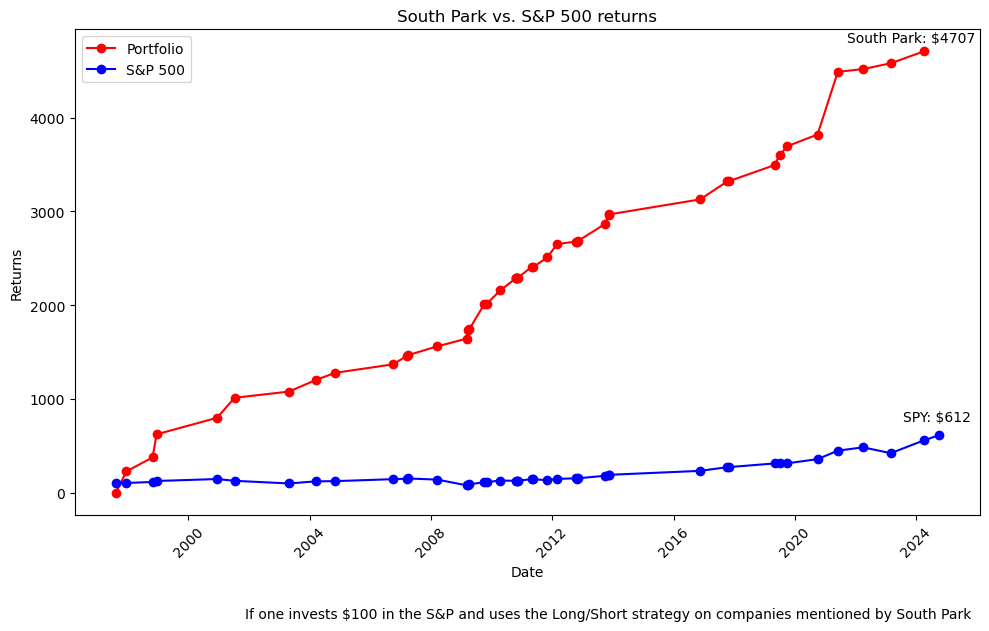

In [421]:
rebalance_dates = [entry[0] for entry in rebalance_log]  # Dates of rebalancing
profit_values = [entry[2] for entry in rebalance_log]    # Corresponding profit values

df_excluded_last = portfolio_df.iloc[:-1]
df_excluded_last.columns = pd.to_datetime(df_excluded_last.columns, errors='coerce')
df = df_excluded_last.dropna(axis=1, how='all')  # Drop columns with NaT

df_numeric = df.select_dtypes(include=['float64', 'int64'])

column_sums_2 = df_numeric.sum()

plt.figure(figsize=(10,6))
# plt.plot(column_sums.index, portfolio_df.loc['BBY'], marker='o', linestyle='-', color='c', label= 'BestBuy')
plt.plot(rebalance_dates, profit_values, marker='o', linestyle='-', color='r', label='Portfolio')
plt.plot(column_sums.index, portfolio_df.loc['SPY_BBY'], marker='o', linestyle='-', color= 'b', label= 'S&P 500')

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('South Park vs. S&P 500 returns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc= 'upper left')
plt.figtext(0.25, -0.04, 'If one invests $100 in the S&P and uses the Long/Short strategy on companies mentioned by South Park')

#last value for SPY_BBY
last_x_value_spy_2 = column_sums_2.index[-1]  # The x value (date) of the last point
last_y_value_spy_2 = portfolio_df.loc['SPY_BBY'].iloc[-1]  # The y value (returns) of the last SPY point
plt.annotate(f'SPY: ${last_y_value_spy_2:.0f}', (last_x_value_spy_2, last_y_value_spy_2), 
             textcoords="offset points", xytext=(-1,10), ha='center')

#last value for BBY
last_x_value_bby = column_sums_2.index[-1]  # The x value (date) of the last point
last_y_value_bby = profit_values[-1]  # The y value (returns) of the last SPY point
plt.annotate(f'South Park: ${last_y_value_bby:.0f}', (last_x_value_bby, last_y_value_bby), 
             textcoords="offset points", xytext=(-20,6.5), ha='center')
plt.savefig('LS_southpark_30d.png')
plt.show()

## Notes
* Buying happens at opening price
* Updating the portfolio happens at the closing price
### Remarks
* Few companies were not publicly traded when they were mentioned in the show
    * In those cases, I included them in the portfolio once they went public
    * Reddit, Yelp, Playboi
* There were also companies that were not picked up by BeautifulSoup for various reasons (change of name, different holding company, etc.). Honorable mentions:
    * New York Times, Twitter(X), Netflix
* Finally, there were companies that were only public for a certain timeframe and got acquired
    * Such as Twitter
    * I excluded these companies from the portfolio because Yahoo Finance didn't have publicly available data regarding the stock's performance

# TO-DOs

* Implement not only for companies mentioned but also ppl mentioned 
* Think abt how the algorithm can be faster